In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
!pip install pytesseract
!apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (15.1 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121975 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-e

In [20]:
!apt-get install tesseract-ocr-ind


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-ind
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 537 kB of archives.
After this operation, 1,138 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 537 kB in 1s (671 kB/s)
Selecting previously unselected package tesseract-ocr-ind.
(Reading database ... 122022 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-ind_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-ind (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-ind (1:4.00~git30-7274cfa-1.1) ...


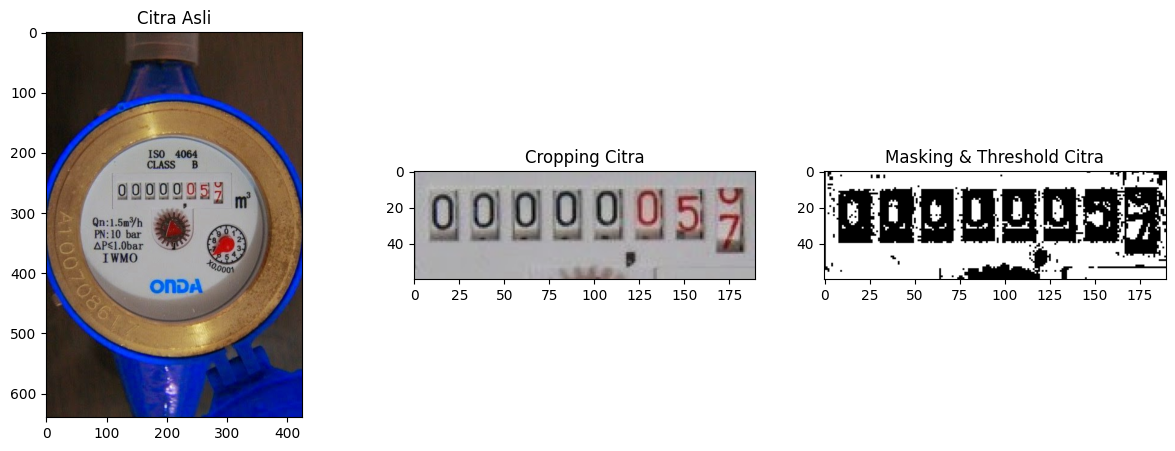


Hasil Ekstrak Teks

99000057



In [46]:
import cv2
import matplotlib.pyplot as plt
import pytesseract
import os
os.environ['TESSDATA_PREFIX'] = '/usr/share/tesseract-ocr/4.00/tessdata/'

# Baca citra
wa_img = cv2.imread('/content/meteran.jpeg')

# Lakukan cropping pada citra
cropped_img = wa_img[240:300, 110:300]  # Sesuaikan koordinat sesuai kebutuhan

# Ubah citra menjadi citra keabuan
wa_gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)

# Terapkan global thresholding pada citra keabuan
global_threshold, wa_thresholded = cv2.threshold(wa_gray, 170, 255, cv2.THRESH_BINARY)

# Tampilkan gambar sebelum dan sesudah ekstraksi
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(wa_img, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')

# Gambar sebelum ekstraksi
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.title('Cropping Citra')

# Gambar setelah ekstraksi
plt.subplot(1, 3, 3)
plt.imshow(wa_thresholded, cmap='gray')
plt.title('Masking & Threshold Citra')

plt.show()

# Ekstrak teks dari citra hasil thresholding
extracted_text = pytesseract.image_to_string(wa_thresholded, lang="ind")

# Tampilkan teks yang diekstrak
print("\nHasil Ekstrak Teks\n\n"+extracted_text)
